In [938]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

import sklearn as sklearn

from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import sklearn.feature_selection as fs
from sklearn import tree

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

from sklearn import svm
from sklearn import metrics
import xgboost as xgboost
from xgboost import XGBRegressor

In [939]:
#Loading the dataset

train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv") 

train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [940]:
print(' No of rows and columns in train data are: {0} rows and {1} columns'.format(train.shape[0], train.shape[1]))

print(' No of rows and columns in test data are: {0} rows and {1} columns'.format(test.shape[0], test.shape[1]))

 No of rows and columns in train data are: 1460 rows and 81 columns
 No of rows and columns in test data are: 1459 rows and 80 columns


# Data Exploration

In [941]:
# Lets see the structure of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

##### Checking for Missing values in the dataset:

In [942]:
# Checking columns with missing values
train.columns[train.isnull().any()]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [943]:
# Checking count of missing values
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

So, from a total of 81 attributes, 19 have missing values. 
Let us check the percentage of missing values in these attributes:

In [944]:
# Missing value counts
missing = train.isnull().sum()/len(train)*100
missing = missing[missing>0]
missing.sort_values(inplace = True)
missing

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

So, the variable with highest number of missing value is 'PoolQC' with 99.5% missing values followed by Miscfeature(96.3%), Alley(93.7%) and Fence(80.7%).



##### Lets check for the distribution of the response variable (SalePrice):
    

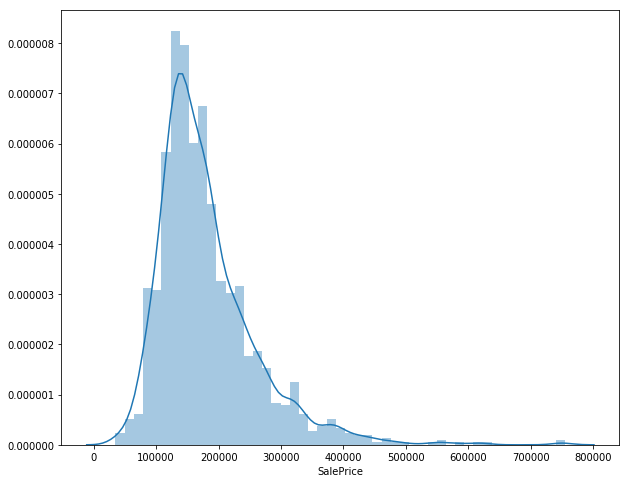

In [945]:
sns.distplot(train['SalePrice'])

Here, we observe that the target variable 'SalePrice' is slightly skewed to the right. Target variables which have normal distribution helps in better modeling relationship between the dependent and independent variables.
Hence we intend to transform the target variable. We can adopt log transformation to get rid of the skewness.


In [946]:
# Checking skewness
train['SalePrice'].skew()

1.8828757597682129

Let us try to transform the target variable by applying log transformation:

In [947]:
# Log tranforming the target variable
target = np.log(train['SalePrice'])
target.skew()


0.12133506220520406

Thus, we observe that the skewness has considerably reduced. Now we plot and check the distribution of the transformed variable.


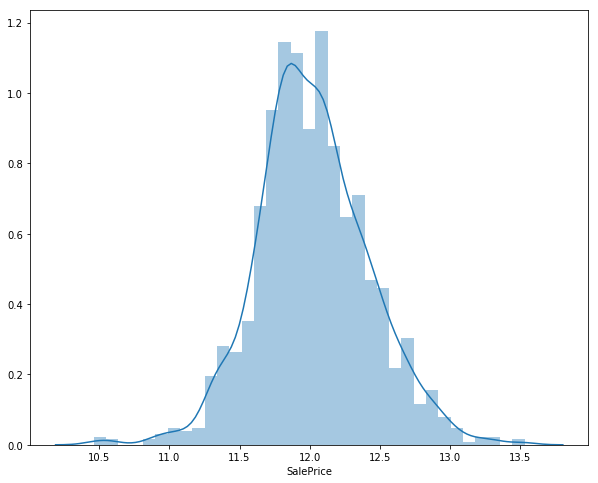

In [948]:
# Plotting the transformed variable 
sns.distplot(target)

Thus, we observe that log transformation has quite fixed the skewness to get a normal distribution.

Text(0.5,1,'Median Price of Home by Neighborhood')

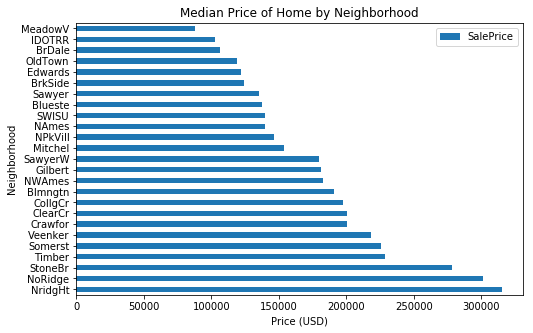

In [949]:
# plot median price by neighborhood
a = pd.DataFrame(train.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending = False))
a.plot.barh(figsize = (8,5))
plt.xlabel('Price (USD)')
plt.title('Median Price of Home by Neighborhood')

Also, lets seperate the categorical variable from the numeric variable for effective visualization.

In [950]:
# seperating categorical and numeric variables
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])

print("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1], cat_data.shape[1]))


There are 38 numeric and 43 categorical columns in train data


We do not need the ID variable and so we can delete it as it does not make much sense.


In [951]:
del numeric_data['Id']

Now, since we have divided the dataset into categorical and numerical data points, we can now check for correlation in the numeric_data:

Let us try to check the correlation of the independent variables with the target variable. By this way, we can eliminate the variables which have a very low correlation with the target variable and thereby reduce the total number of variables to be considered for modeling.



### Correlation analysis plot:

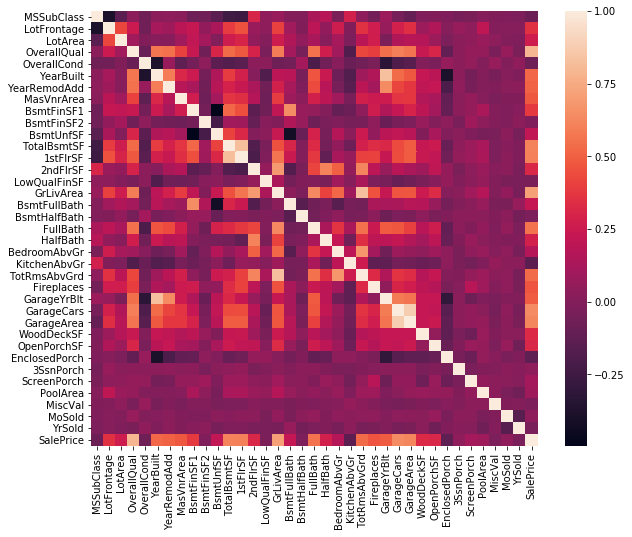

In [953]:
# Correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

The last row has 'SalePrice' which can be compared with correlations of other variables. 
Let us try to check the numeric correlation values of variables with 'SalePrice'

In [954]:
corr['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [1005]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n') #top 5 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Let us visualize some of the highly correlated variables:

The variable 'Overallqual' is 79% correlated with the target variable. Next is GrLivArea which is 70% correlated. 
The high correlation of thest two variables makes practical sense as well.

Let us further try to visualize some of these highly corrlated variables:



In [955]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

This variable seems to be rated on a scale of 1-10 and therefore is an ordinal variable.
Lets further explore this variable by checking the median sale price of houses wrt OverallQual.(We use median since our target variable was found to be skewed which contains outliers and medians are robust to outliers.)

In [956]:
# Creating aggregated tables using Pandas pivot table
# Plotting median price per quality level
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


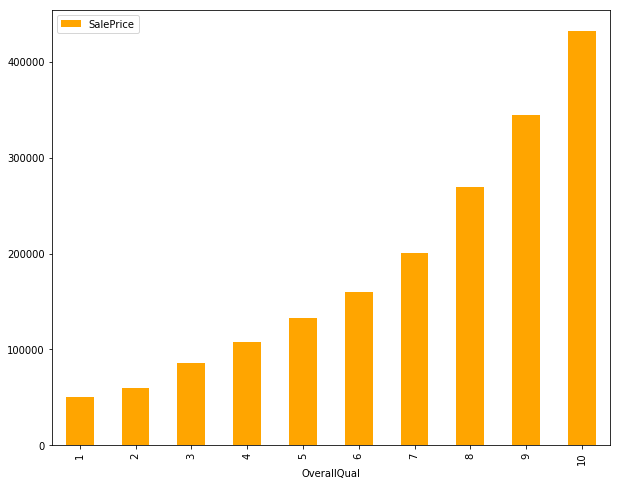

In [957]:
# Plotting the table to observe Median SalePrices
pivot.plot(kind='bar', color='orange')

Thus, understandably, we observe that as the Overall Quality increases, the Median Sale price also rises.

Lets visualize the next highly correlated variable GrLivArea:

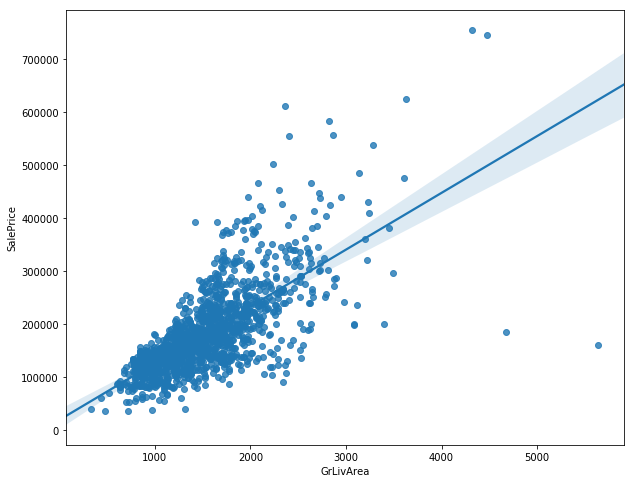

In [958]:
# Plotting GrLivArea
sns.regplot(x=train['GrLivArea'], y= train['SalePrice'])

Thus, we observe that Sale Price and GrLivArea have a direct correlation. 
An oulier can be observed at GrLivArea > 4000 and therefore needs to be eliminated as such ouliers lower a model's performance.

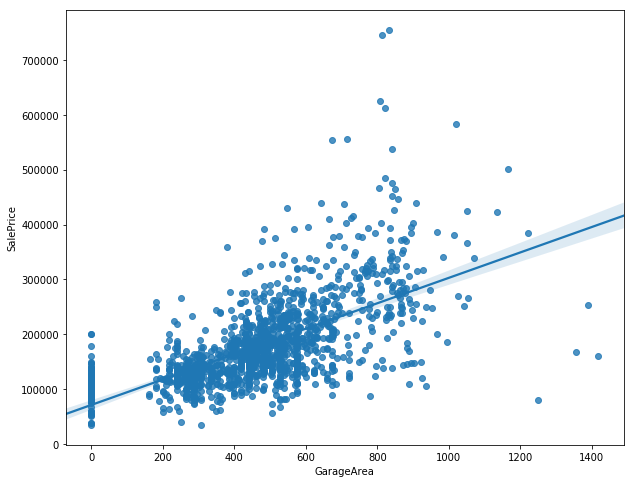

In [959]:
sns.regplot(x=train['GarageArea'], y=train['SalePrice'])

Similarly, for GarageArea also we can observe a direct correlation indicating higher the Garage Area higher is the Sale Price. 

Let us now visualize the categorical variables:

In [960]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Let us check the median sale price of a house based on its Sale Condition:

In [961]:
sp_pivot = train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


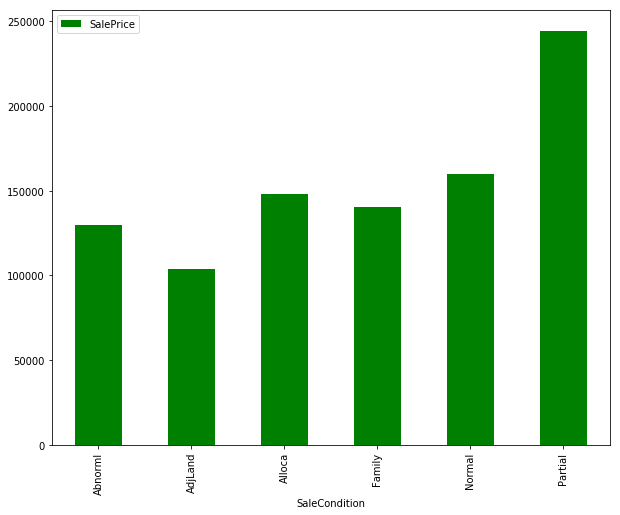

In [962]:
sp_pivot.plot(kind="bar", color="green")

We observe that Sale Condition 'Partial' fetches the highest Median Price.

Let's define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price.

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

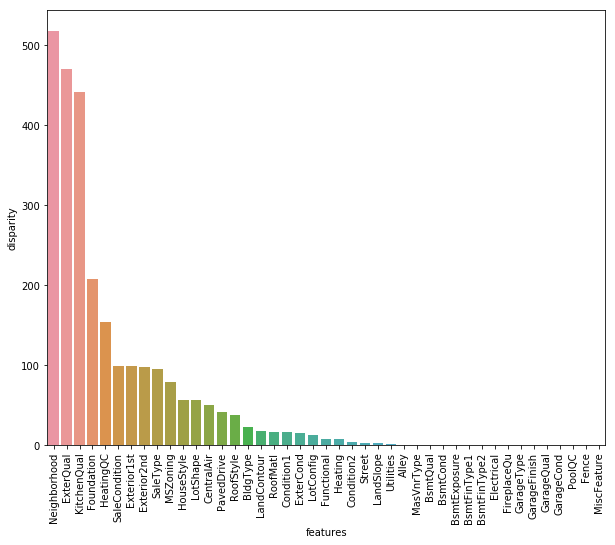

In [963]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

Among all categorical variables, Neighborhood turned out to be the most important feature followed by ExterQual, KitchenQual, etc. It means that people also consider the goodness of the neighborhood, the quality of the kitchen, the quality of the material used on the exterior walls etc prior to purchasing a house

Now, let us plot Histograms for the dependent variables and check for skewness


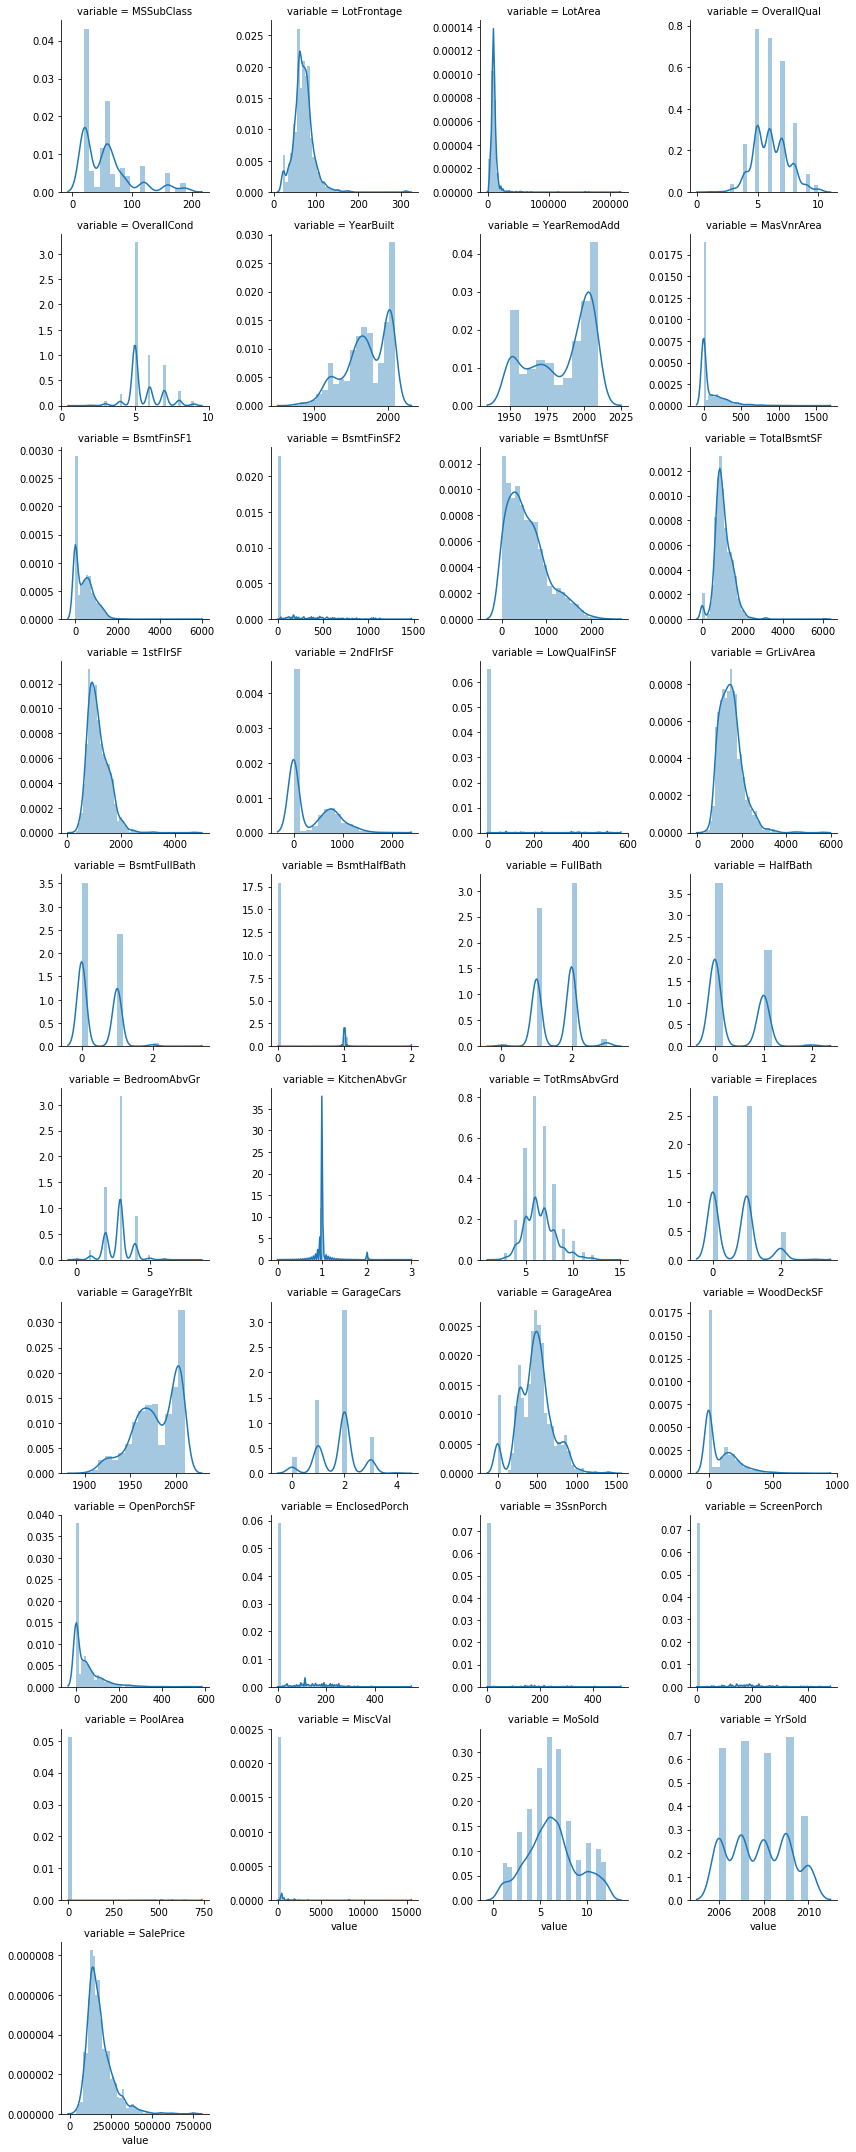

In [964]:
# Create numeric data histograms

num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

As we can observe, most of the variables seem to be rightly skewed which we will transform later on. 
Now let us plot box plots to check for the distribution of catgeorical variables:

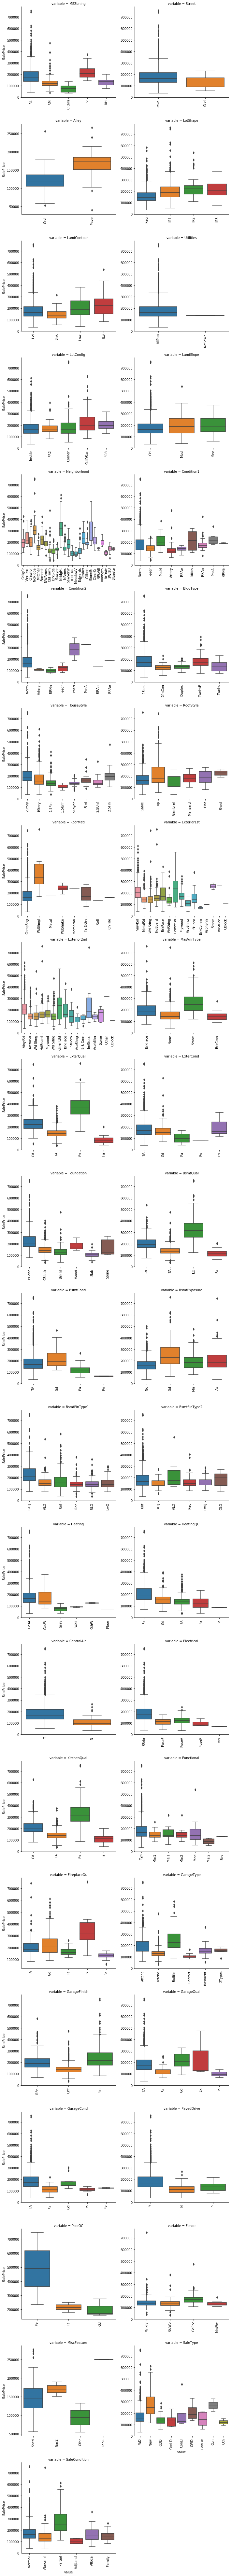

In [965]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

Here, we observe that most of the variables have outliers and it will be very inconvenient to get rid of them one by one.
Hence, we will leave them as it is and let the algorithm take care of it. Tree based algorithms are usually robust to outliers. 

# Data Pre-Processing

In this stage, we will handle outlier values, impute missing values, encode categorical variables to make the data consistent.

In [966]:
# Removing the outlier from GrLivArea found earlier

train.drop(train[train['GrLivArea']>4000].index, inplace = True)
train.shape

(1456, 81)

Row 666 in the test data has missing information for variables related to 'Garage'(GarageQual, GarageCond,GarageFinish, GarageYrBlt) 
Let us impute these values using the mode of these variables:

In [967]:
# imputing using mode
test.loc[666, 'GarageQual']="TA"
test.loc[666, "GarageCond"]="TA"
test.loc[666, "GarageFinish"]="Unf"
test.loc[666, "GarageYrBlt"]="1980"

In row 1116,in test data, all garage variables are NA except GarageType. Lets make it NA as well.

In [968]:
test.loc[1116,"GarageType"]=np.nan

Now, let us encode the categorical variables. 
LabelEncoder function from sklearn can be used to encode variables.

In [969]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na= None):
    if fill_na is not None:
        data[var].fillna(fill_na, inplace = True)
    le.fit(data[var])
    data[var] = le.transform(data[var])
    return data





This function imputes blank levels with mode values.
    Let us now impute the missing values in LotFrontage variable by its median value of LotFrontage by neighborhood. To do this, we will combine our train and test set to modify both data sets at once.

In [970]:
# Combining train and test set
alldata = train.append(test)
alldata.shape


(2915, 81)

Now let us impute the LotFrontage variable

In [971]:
# imputing LotFrontage by median of Neighborhood
lot_fr_by_nhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_fr_by_nhood:
    idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
    alldata.loc[idx, 'LotFrontage'] = group.median()

Now, let us impute the missing values in other numeric variables by 0.

In [972]:
# Imputing missing values = 0
alldata['MasVnrArea'].fillna(0, inplace = True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

Now, let us convert the categorical variables into ordinal variables. To do this, we will simply create a dictionary of key-value pairs and map it to the variable in the data set.

In [973]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

#encoding data
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
         factorize(alldata, x)

#encode variables and impute missing values
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

# Feature Engineering

Let us create some binary variables depicting the presence or absence of a category. The new feature will contain 0 or 1 values. Also we will create some more features which will be described in comments.

In [870]:
#creating new variable (1 or 0) based on irregular count levels
#The level with highest count is kept as 1 and rest as 0
alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1

#Did the modeling happen during the sale year?
alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1

# Was this house sold in the year it was built?
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

#setting levels with high count as 1 and the rest as 0
#you can check for them using the value_counts function
alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [974]:
# Checking dimensions
alldata.shape

(2915, 81)

So, now we have added 19 more columns to our initial 81 columns. 

We will again append the original train and test set to create a new alldata2 file containing original features. 
We will use this file as a reference to create additional features:

In [975]:
# create alldata2
alldata2 = train.append(test)

alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# house completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})



Just like Garage, we have several columns associated with the area of the property. An interesting variable could be the sum of all areas for a particular house. 
In addition, we can also create new features based on the year the house was built.

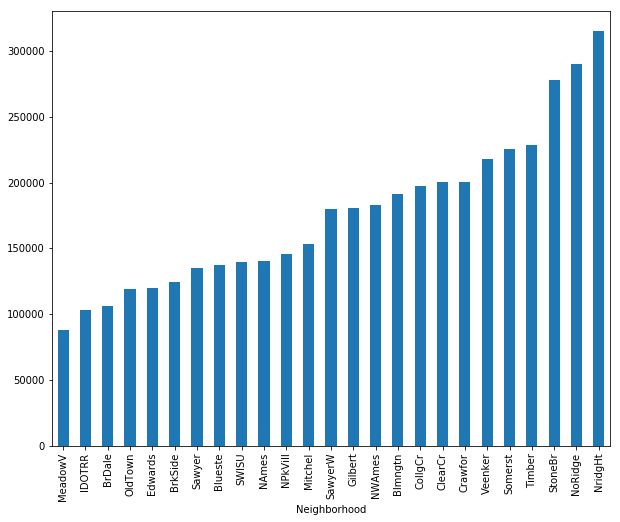

In [976]:
#calculating total area using all area columns
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = 2010 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]

# Simplifications of existing features into bad/average/good based on counts
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

#grouping neighborhood variable based on this plot
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')

The graph above gives us a good hint on how to combine levels of the neighborhood variable into fewer levels. 
We can combine bars of somewhat equal height in one category. To do this, we'll simply create a dictionary and map it with variable values.

In [977]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, "Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}

alldata['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)
alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# House completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})
alldata.shape

(2915, 107)

Thus, we have created 43 more variables. Let us split it into train and test set and create some more features.

In [978]:
# creating new data

train_new = alldata[alldata['SalePrice'].notnull()]

test_new  = alldata[alldata['SalePrice'].isnull()]

print(train_new.shape)
print(test_new.shape)

(1456, 107)
(1459, 107)


Now, we'll transform numeric features and remove their skewness.



In [979]:
#get numeric features
numeric_features = [f for f in train_new.columns if train_new[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])
del test_new['SalePrice']

Now, let us standardize the numeric features


In [980]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

for i, col in enumerate(numeric_features):
       train_new[col] = scaled[:,i]

numeric_features.remove('SalePrice')
scaled = scaler.fit_transform(test_new[numeric_features])

for i, col in enumerate(numeric_features):
      test_new[col] = scaled[:,i]

Now let us one hot encode the categorical variable, so that every level of a categorical variable results in a new variable with binary values ( 0 or 1): 

In [981]:
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "MSSubClass", None)
       onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
       onehot_df = onehot(onehot_df, df, "LotConfig", None)
       onehot_df = onehot(onehot_df, df, "Neighborhood", None)
       onehot_df = onehot(onehot_df, df, "Condition1", None)
       onehot_df = onehot(onehot_df, df, "BldgType", None)
       onehot_df = onehot(onehot_df, df, "HouseStyle", None)
       onehot_df = onehot(onehot_df, df, "RoofStyle", None)
       onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Foundation", None)
       onehot_df = onehot(onehot_df, df, "SaleType", "WD")
       onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

       #Fill in missing MasVnrType for rows that do have a MasVnrArea.
       temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
       idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
       temp_df.loc[idx, "MasVnrType"] = "BrkFace"
       onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

       onehot_df = onehot(onehot_df, df, "LotShape", None)
       onehot_df = onehot(onehot_df, df, "LandContour", None)
       onehot_df = onehot(onehot_df, df, "LandSlope", None)
       onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
       onehot_df = onehot(onehot_df, df, "GarageType", "None")
       onehot_df = onehot(onehot_df, df, "PavedDrive", None)
       onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
       onehot_df = onehot(onehot_df, df, "Street", None)
       onehot_df = onehot(onehot_df, df, "Alley", "None")
       onehot_df = onehot(onehot_df, df, "Condition2", None)
       onehot_df = onehot(onehot_df, df, "RoofMatl", None)
       onehot_df = onehot(onehot_df, df, "Heating", None)

       # we'll have these as numerical variables too
       onehot_df = onehot(onehot_df, df, "ExterQual", "None")
       onehot_df = onehot(onehot_df, df, "ExterCond", "None")
       onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
       onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
       onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
       onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
       onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
       onehot_df = onehot(onehot_df, df, "GarageQual", "None")
       onehot_df = onehot(onehot_df, df, "GarageCond", "None")
       onehot_df = onehot(onehot_df, df, "PoolQC", "None")
       onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
       onehot_df = onehot(onehot_df, df, "Functional", "Typ")
       onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
       onehot_df = onehot(onehot_df, df, "Fence", "None")
       onehot_df = onehot(onehot_df, df, "MoSold", None)

       # Divide  the years between 1871 and 2010 into slices of 20 years
       year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
       yearbin_df = pd.DataFrame(index = df.index)
       yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
       yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
       yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
       yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

       onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
       return onehot_df

#create one-hot features
onehot_df = munge_onehot(train)

neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
neighborhood_test = pd.DataFrame(index=test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

Let's add the one-hot variables in our train data set.

In [982]:
train_new = train_new.join(onehot_df)

In [983]:
print('The number of rows is {0} and {1} number of columns'.format(train_new.shape[0], train_new.shape[1]))



The number of rows is 1456 and 415 number of columns


Similarly, let us add one hot encoded data in test set as well:

In [984]:
# test_new.drop('Alley', axis = 1)
#adding one hot features to test
onehot_df_te = munge_onehot(test)
onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape


(1459, 398)

We osberve that the train set has more number of columns than the test set and so we will have to remove those variables and keep an equal number of columns in train and test data.

In [985]:
#dropping some columns from the train data as they are not found in test
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone","_Exterior2nd_Other","_HouseStyle_2.5Fin","_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix", "_MiscFeature_TenC", "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis = 1, inplace=True)
train_new.shape


(1456, 399)

In [986]:
# Removing columns with lots of zeroes
#removing one column missing from train data
test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

# Drop these columns
drop_cols = ["_Condition2_PosN", # only two are not zero
         "_MSZoning_C (all)",
         "_MSSubClass_160"]

train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)

Let us transform the response variable and store it in a new array:

In [987]:
# Creating a label set
label_df = pd.DataFrame(index = train_new.index, columns=['SalePrice'])
label_df['SalePrice']= np.log(train['SalePrice'])
print("Train set size:", train_new.shape)
print("Test set size:", test_new.shape)

Train set size: (1456, 396)
Test set size: (1459, 394)


# Model Training and Evaluation

So, we are done with the Data Preprocessing part. Let us move onto training and evaluating the model.
We will use different Machine Learning algorithms: Multiple Linear regression, Lasso Regression,Elastic Net regression, Support Vector Regression, ensemble methods such as XGBoost, Random Forest and lastly Artificial Neural Network.


In [988]:
from sklearn import preprocessing 
for f in train_new.columns: 
    if train_new[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(train_new[f].values)) 
        train_new[f] = lbl.transform(list(train_new[f].values))

for f in label_df.columns: 
    if label_df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(label_df[f].values)) 
        label_df[f] = lbl.transform(list(label_df[f].values))

# train.fillna((-999), inplace=True) 
# test.fillna((-999), inplace=True)

train_new=np.array(train_new) 
label_df=np.array(label_df) 
train_new = train_new.astype(float) 
label_df = label_df.astype(float) 

### Model 1: Multiple Linear Regression


In [989]:
# Fitting the Model
import statsmodels.api as sm

model = sm.OLS(label_df, train_new).fit()



In [990]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = model.predict(train_new)
y_test = label_df
print("Linear Regression score on training set: ", rmse(y_test, y_pred))

Linear Regression score on training set:  5.202388192270092e-07


The rmse is very less, almost equal to zero. It seems, there might be a chance of Overfitting, let us check the model diagnostics:


In [991]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.278e+12
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:48:57   Log-Likelihood:                 19001.
No. Observations:                1456   AIC:                        -3.741e+04
Df Residuals:                    1160   BIC:                        -3.585e+04
Df Model:                         295                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.572e-08   8.77e-08     -0.635      0.525   -2.28e-07    1.16e-07
x2         -4.302e-07   1.32e-07     -3.258      0.001   -6.89e-07   -1.71e-07
x3         -2.237e-08   1.75e-08     -1.276      0.202   -5.68e-08     1.2e-08
x4             0.2769   1.19e-07   2.32e+06      0.000       0.277       0.277
x5           6.38e-08   3.04e-08      2.098      0.036    4.13e-09    1.23e-07
x6             0.1650    1.5e-07    1.1e+06      0.000       0.165       0.165
x7            -0.1271   1.78e-07  -7.12e+05      0.000      -0.127      -0.127
x8             0.0110    1.2e-07   9.17e+04      0.000       0.011       0.011
x9         -1.183e-07   3.94e-08     -2.999      0.003   -1.96e-07   -4.09e-08
x10        -9.765e-08   1.33e-07     -0.735      0.463   -3.58e-07    1.63e-07
x11            0.0036   2.21e-08   1.61e+05      0.000       0.004       0.004
x12            0.1814   1.38e-07   1.32e+06      0.000       0.181       0.181
x13          2.43e-08   2.71e-08      0.897      0.370   -2.89e-08    7.75e-08
x14         1.359e-08   1.91e-08      0.710      0.478    -2.4e-08    5.11e-08
x15           -0.0456   5.37e-08  -8.48e+05      0.000      -0.046      -0.046
x16         -7.45e-09   3.22e-08     -0.232      0.817   -7.06e-08    5.57e-08
x17         1.229e-07   2.62e-08      4.699      0.000    7.16e-08    1.74e-07
x18            0.0187   2.96e-08   6.31e+05      0.000       0.019       0.019
x19          -1.9e-07   2.58e-07     -0.738      0.461   -6.95e-07    3.15e-07
x20         2.465e-07   6.29e-07      0.392      0.695   -9.88e-07    1.48e-06
x21         2.747e-08   2.13e-08      1.291      0.197   -1.43e-08    6.92e-08
x22           -0.0609    7.9e-08  -7.72e+05      0.000      -0.061      -0.061
x23           -0.0452   6.58e-08  -6.88e+05      0.000      -0.045      -0.045
x24         -8.18e-07   7.76e-07     -1.054      0.292   -2.34e-06    7.05e-07
x25           -0.0105   1.52e-07  -6.93e+04      0.000      -0.011      -0.011
x26            0.1641   7.11e-08   2.31e+06      0.000       0.164       0.164
x27            0.0018   4.95e-08   3.69e+04      0.000       0.002       0.002
x28        -7.568e-08   4.35e-08     -1.738      0.082   -1.61e-07    9.75e-09
x29            0.0368   4.64e-08   7.93e+05      0.000       0.037       0.037
x30         -9.47e-08   3.26e-08     -2.905      0.004   -1.59e-07   -3.08e-08
x31           -0.0101   7.25e-08  -1.39e+05      0.000      -0.010      -0.010
x32        -7.808e-08   4.54e-08     -1.719      0.086   -1.67e-07     1.1e-08
x33        -6.231e-08   4.52e-08     -1.378      0.168   -1.51e-07    2.64e-08
x34           -0.1439   1.59e-07  -9.06e+05      0.000      -0.144      -0.144
x35           -0.0222   3.68e-08  -6.02e+05      0.000      -0.022      -0.022
x36           -0.1045   2.23e-07  -4.69e+05      0.000      -0.105      -0.105
x3

##### Here, we see that the Adjusted R-sq value is close to 1, which indicates Model overfit as we had predicted from the rmse value earlier.  This is probably due to a very large number of variables as compared to data points which is increasing the model complexity. We will try to reduce the model complexity by reducing the number of variables. 

##### Let us use Lasso regression for that:

### Model 2: Lasso regression

We will be computing rmse score for Lasso regression with a 10-fold cross validation and 5000 iterations to find the best value. 

In [992]:
# Lasso Regression with Cross-Validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
model_lasso = LassoCV(alphas = np.logspace(-5, 5, 100), max_iter=5000) #lassoCV does CV on alpha
model_lasso.fit(train_new,label_df)


from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = model_lasso.predict(train_new)
y_test = label_df
print("Lasso regression score on training set: ", rmse(y_test, y_pred))



Lasso regression score on training set:  0.0004799373186509731


##### Looks, like Lasso performs far better than Multiple Linear Regression  since its rmse score is lower. 

### Model 3: Elastic Net Regression

Let us now check our performance with Elasticnet Regression which is a mixed technqiue of Ridge and Lasso and which helps to solve the limitations of Ridge and Lasso.

In [993]:
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
elastic_cv = linear_model.ElasticNetCV(l1_ratio= np.linspace(0.0001,1,20),alphas = np.logspace(-5,10,50), cv=10, max_iter=2000)
elastic_cv.fit(train_new, label_df)

from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = elastic_cv.predict(train_new)
y_test = label_df
print("Elastic score on training set: ", rmse(y_test, y_pred))

Elastic score on training set:  0.0015590740610246206


##### Thus, we see here that lasso regression outperforms ElasticNet in model performance.

### Model 4: Support Vector Regression


In [994]:
#svr rbf kernel
svr_rbf = sklearn.svm.SVR(kernel = 'rbf',C=1e3, epsilon=0.1, gamma = 0.00002)
y_rbf=svr_rbf.fit(train_new, label_df) 
#SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
#    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200,verbose=False, max_iter=-1)

def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = y_rbf.predict(train_new)
y_test = label_df
print("SVR score: ", rmse(y_test, y_pred))

SVR score:  0.05066550428039031


##### Thus, we see that Support Vector regression performance is less as compared to the previous models of Lasso and ElasticNet.

#### Let us apply some Ensemble methods here and check their performances:

### Model 5: XgBoost

In [995]:
# import os
## Installing XgBoost
# !pip install xgboost
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,max_depth=6,
                       min_child_weight = 1.5, n_estimators =7200, reg_alpha =0.9,
                       reg_lambda =0.6, subsample =0.2, seed = 42, silent=1) 
# These parameters’ values are derived using cross-validation.

regr.fit(train_new, label_df)


from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(train_new)
y_test = label_df
print("XGBoost score on training set: ", rmse(y_test, y_pred))



XGBoost score on training set:  0.030622177814047802


##### Performance of XgBoost is lesser as compared to Lasso and ElasticNet but slightly better than SVR.



### Model 6: Random Forest

In [996]:

from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestRegressor()
model_RF.fit(train_new, label_df)

def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = model_RF.predict(train_new)
y_test = label_df
print("Random Forest score on training set: ", rmse(y_test, y_pred))


Random Forest score on training set:  0.003217039244326305


#### Since the data set is high dimensional (means large number of features), let us build a neural network model as well. We'll use the keras library to train the neural network.

### Model 7: Artificial Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(10)

# create Model
# define base model
def base_model():
     model = Sequential()
     model.add(Dense(20, input_dim=398, init='normal', activation='relu'))
     model.add(Dense(10, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adam')
     return model

# train_new = train_new.astype(np.float)
 # test_new = test_new.astype(np.float)

seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(train_new)
X_test = scale.fit_transform(test_new)


keras_label = np.asmatrix(label_df)
clf = KerasRegressor(build_fn=base_model, nb_epoch=1000, batch_size=5,verbose=0)
clf.fit(X_train,keras_label)

#make predictions 
kpred = clf.predict(X_test) 
kpred = np.exp(kpred)
pred_df = pd.DataFrame(kpred, index=test["Id"], columns=["SalePrice"])
# pred_df.to_csv('keras1.csv', header=True, index_label='Id')


We get RMSE as 0.35346 for the ANN model which is worse than the previous models. 

### Performances of the ML techniques in decreasing order:

In [1004]:
from IPython.display import HTML, display

data = [['ML Technqiue', 'RMSE performance'],
         ['Lasso Regression',0.0004],
         ['Elastic Net Regression',0.0015],
         ['Random Forest', 0.003],
         ['XgBoost', 0.0306],
         ['Support vector regression', 0.0506],        
         ['ANN', 0.35],
        ]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

ML Technqiue,RMSE performance
Lasso Regression,0.0004
Elastic Net Regression,0.0015
Random Forest,0.003
XgBoost,0.0306
Support vector regression,0.0506
ANN,0.35


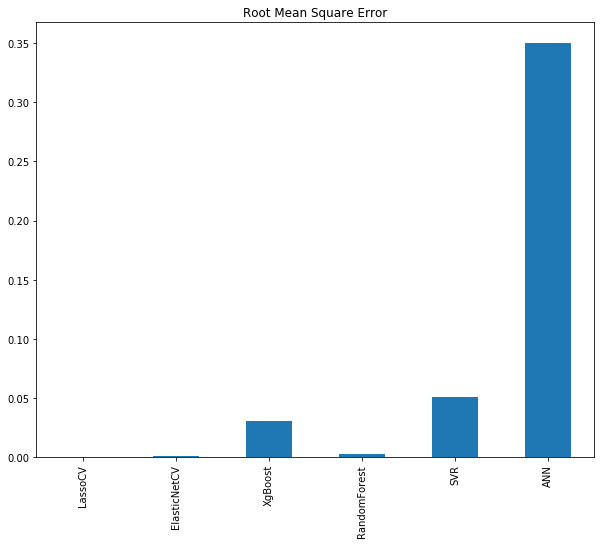

In [1006]:
# Creating RMSE Dictionary
rmse_dict = {'data':[0.0004, 0.0015, 0.0306, 0.003,0.0506, 0.35]}

# Creating RMSE DataFrame 
rmse_df = pd.DataFrame(data = rmse_dict, index = ['LassoCV','ElasticNetCV','XgBoost','RandomForest','SVR','ANN'])

# Plotting RMSE 
rmse_df.plot.bar(legend = False, title = 'Root Mean Square Error')

# Conclusions:
### Thus we see that Lasso Regression is the best model in this problem case with rmse as 0.0004 far outweighing the performance of all other models.

### This is mostly due to its important regularization property of variable reduction which seems to be very helpful on this dataset with a very high number of variables (396)

### ElasticNet regression is the 2nd best model with rmse of 0.0015 which is fairly understandable as this algorithm has more proximity to Lasso Regression.